<a href="https://colab.research.google.com/github/123prassu/deep-learning/blob/main/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install unrar if not installed
!apt-get install unrar -y

# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/dogs-vs-cats.rar
No such file or directory
No files to extract


In [3]:
# Verify extraction
!ls "/content/dogs-vs-cats/"
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset directory
dataset_dir = "/content/dogs-vs-cats/"

# Define image size & batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

ls: cannot access '/content/dogs-vs-cats/': No such file or directory


In [4]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
       zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)


In [5]:
# Load training & validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Since it's a binary classification (dogs vs cats)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats/'

In [6]:
# Install unrar if not installed
!apt-get install unrar -y

# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"

# Verify extraction
import os
if not os.path.exists("/content/dogs-vs-cats/"):
    print("Error: Dataset directory not found. Check if the archive was extracted successfully.")
else:
    !ls "/content/dogs-vs-cats/"
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # Define dataset directory
    dataset_dir = "/content/dogs-vs-cats/"

    # Define image size & batch size
    IMG_SIZE = (150, 150)
    BATCH_SIZE = 32

    # Data augmentation for training set
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2  # 80% train, 20% validation
    )

    # Load training & validation datasets
    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Since it's a binary classification (dogs vs cats)
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/dogs-vs-cats.rar
No such file or directory
No files to extract
Error: Dataset directory not found. Check if the archive was extracted successfully.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
      Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

NameError: name 'train_generator' is not defined

In [10]:
# Install unrar if not installed
!apt-get install unrar -y

# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"

# Verify extraction
import os
if not os.path.exists("/content/dogs-vs-cats/"):
    print("Error: Dataset directory not found. Check if the archive was extracted successfully.")
else:
    !ls "/content/dogs-vs-cats/"
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # Define dataset directory
    dataset_dir = "/content/dogs-vs-cats/"

    # Define image size & batch size
    IMG_SIZE = (150, 150)
    BATCH_SIZE = 32

    # Data augmentation for training set
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2  # 80% train, 20% validation
    )

    # Load training & validation datasets
    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Since it's a binary classification (dogs vs cats)
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
# %%
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
      Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

# %%
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()
# %%
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/dogs-vs-cats.rar
No such file or directory
No files to extract
Error: Dataset directory not found. Check if the archive was extracted successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'train_generator' is not defined

In [11]:
# Install unrar if not installed
!apt-get install unrar -y

# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"

# Verify extraction
import os
if not os.path.exists("/content/dogs-vs-cats/"):
    print("Error: Dataset directory not found. Check if the archive was extracted successfully.")
else:
    !ls "/content/dogs-vs-cats/"
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # Define dataset directory
    dataset_dir = "/content/dogs-vs-cats/"

    # Define image size & batch size
    IMG_SIZE = (150, 150)
    BATCH_SIZE = 32

    # Data augmentation for training set
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2  # 80% train, 20% validation
    )

    # Load training & validation datasets
    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Since it's a binary classification (dogs vs cats)
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
# %%
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
      Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

# %%
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()
# %%
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/dogs-vs-cats.rar
No such file or directory
No files to extract
Error: Dataset directory not found. Check if the archive was extracted successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'train_generator' is not defined

In [18]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

NameError: name 'train_generator' is not defined

In [15]:
# Install unrar if not installed
!apt-get install unrar -y

# Extract the dataset
!unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"

# Verify extraction
import os
if not os.path.exists("/content/dogs-vs-cats/"):
    print("Error: Dataset directory not found. Check if the archive was extracted successfully.")
else:
    !ls "/content/dogs-vs-cats/"
    import tensorflow as tf
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    # Define dataset directory
    dataset_dir = "/content/dogs-vs-cats/"

    # Define image size & batch size
    IMG_SIZE = (150, 150)
    BATCH_SIZE = 32

    # Data augmentation for training set
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2  # 80% train, 20% validation
    )

    # Load training & validation datasets
    train_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Since it's a binary classification (dogs vs cats)
        subset='training'
    )

    val_generator = train_datagen.flow_from_directory(
        dataset_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
      Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open /content/dogs-vs-cats.rar
No such file or directory
No files to extract
Error: Dataset directory not found. Check if the archive was extracted successfully.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

NameError: name 'train_generator' is not defined

In [19]:
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

NameError: name 'plt' is not defined

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Extracting dataset...

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/dogs-vs-cats.rar

Creating    /content/dogs-vs-cats                                     OK
Creating    /content/dogs-vs-cats/dogs-vs-cats                        OK
Creating    /content/dogs-vs-cats/dogs-vs-cats/cats                   OK
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/240_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg       2%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/61d1c0e2aa741500193b2d18.jpg      10%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/Cat_November_2010-1a.jpg      40%  OK 
Extracting  /content/dogs-vs-cats/dogs-vs-cats/cats/download.jfif         41%  OK 
Creatin

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.6622 - val_accuracy: 1.0000 - val_loss: 3.5282e-10
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 1.0000 - loss: 4.0181e-06 - val_accuracy: 1.0000 - val_loss: 4.8881e-19
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.0404e-09 - val_accuracy: 1.0000 - val_loss: 5.0039e-28
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step - accuracy: 1.0000 - loss: 2.0907e-13 - val_accuracy: 1.0000 - val_loss: 2.5054e-37
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step - accuracy: 1.0000 - loss: 2.1853e-18 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step - accuracy: 1.0000 - loss: 2.1428e-19 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step - accuracy: 1.0000 - loss: 3.3128e-21 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step - accuracy: 1.0000 - l

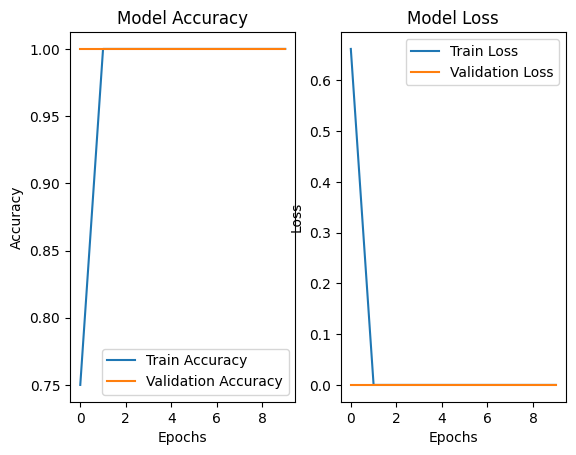

In [20]:
# Install unrar if not installed
!apt-get install unrar -y

# Define dataset directory
dataset_dir = "/content/dogs-vs-cats/"

# Check if dataset directory exists, if not extract
if not os.path.exists(dataset_dir):
    print("Extracting dataset...")
    !unrar x "/content/dogs-vs-cats.rar" "/content/dogs-vs-cats/"
    if not os.path.exists(dataset_dir):
      print("Error: Dataset extraction failed.")
    else:
      !ls "/content/dogs-vs-cats/"
else:
    print("Dataset already extracted.")
    !ls "/content/dogs-vs-cats/"


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image size & batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% train, 20% validation
)

# Load training & validation datasets
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Since it's a binary classification (dogs vs cats)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), strides=(1,1), padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),
      Conv2D(64, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding="same"),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

import matplotlib.pyplot as plt
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt # Import matplotlib.pyplot

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        label = "Dog"  # Define label
        confidence = prediction # Define confidence
        print(f"The image is a Dog ({prediction:.2f})")
    else:
        label = "Cat" # Define label
        confidence = 1 - prediction # Define confidence
        print(f"The image is a Cat ({1 - prediction:.2f})")
    # Display the image, indented correctly
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Prediction: {label} ({confidence:.2f})")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
The image is a Cat (1.00)


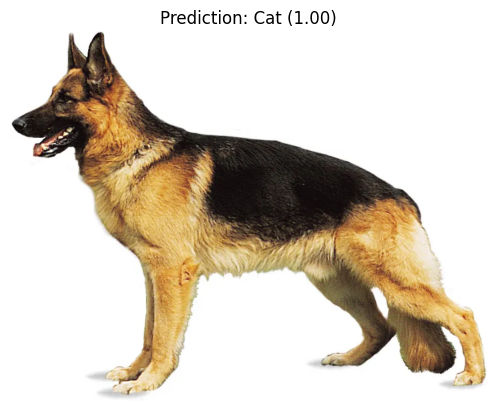

In [23]:
predict_image("/content/German-shepherd.webp")